In [1]:
# kobert모델 작동 확인 ("https://huggingface.co/monologg/kobert")

In [2]:
# 데이터 전처리 과정

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1) CSV 파일 경로 (사용자가 다운로드한 경로로 수정 필요)
file1 = '/content/감성대화말뭉치(최종데이터)_Training.xlsx'  # 감정 대화 말뭉치 예시 파일명 1, 2
file2 = '/content/감성대화말뭉치(최종데이터)_Validation.xlsx'
file3 = '/content/4차년도.csv'  # 감정 문장 데이터셋 예시 파일명 1, 2, 3
file4 = '/content/5차년도.csv'
file5 = '/content/5차년도_2차.csv'


# 2) 데이터 불러오기
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
# 인코딩을 utf-8이 아닌 euc-kr 또는 cp949로 설정
df3 = pd.read_csv(file3, encoding='cp949')
df4 = pd.read_csv(file4, encoding='cp949')
df5 = pd.read_csv(file5, encoding='cp949')

# 3) 데이터셋 구조 확인 (출력해보시고 컬럼명 맞추기)
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())

   Unnamed: 0  연령  성별     상황키워드  신체질환 감정_대분류 감정_소분류  \
0           1  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
1           2  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
2           3  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
3           4  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   
4           5  청년  여성  진로,취업,직장  해당없음     분노  노여워하는   

                                               사람문장1  \
0                          일은 왜 해도 해도 끝이 없을까? 화가 난다.   
1     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.   
2  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...   
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...   
4              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.   

                                              시스템문장1  \
0                        많이 힘드시겠어요. 주위에 의논할 상대가 있나요?   
1           급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?   
2  회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...   
3  관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...   
4  무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...

In [4]:
# 예시: 데이터셋 모두 'text'와 'emotion' 컬럼이 있다고 가정
# 만약 컬럼명이 다르면 알맞게 변경 필요

# 4) 데이터셋 컬럼명 통일
df1 = df1.rename(columns={'사람문장1': 'text', '감정_대분류': 'emotion'})
df2 = df2.rename(columns={'사람문장1': 'text', '감정_대분류': 'emotion'})
df3 = df3.rename(columns={'발화문': 'text', '상황': 'emotion'})
df4 = df4.rename(columns={'발화문': 'text', '상황': 'emotion'})
df5 = df5.rename(columns={'발화문': 'text', '상황': 'emotion'})

In [5]:
# '감성 대화 말뭉치' 데이터셋 ("https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=data&dataSetSn=86")


# pandas 사용

# 감정_대분류와 사람문장1 컬럼만 추출
df1 = df1[['emotion', 'text']]
df2 = df2[['emotion', 'text']]

# 결과 확인
print(df1.head())
print(df2.head())

  emotion                                               text
0      분노                          일은 왜 해도 해도 끝이 없을까? 화가 난다.
1      분노     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2      분노  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3      분노  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4      분노              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.
  emotion                                               text
0      불안  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
1      불안              회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.
2      불안                      상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.
3      불안          이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.
4      불안                       직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.


In [6]:
# 감정 대분류 종류 확인
emotion_categories_1 = df1['emotion'].unique()
emotion_categories_2 = df2['emotion'].unique()

# 출력
print("emotion_type:")
print(emotion_categories_1)
print(emotion_categories_2)

emotion_type:
['분노' '기쁨' '불안' '당황' '슬픔' '상처']
['불안' '슬픔' '당황' '기쁨' '분노' '상처']


In [7]:
# 감정 분류를 위한 대화 음성 데이터셋 ("https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=263")
#4차년도 14,606건
#5차년도 10,011건
#5차년도(2차) 19,374건

# pandas 사용

# 감정_대분류와 사람문장1 컬럼만 추출
df3 = df3[['emotion', 'text']]
df4 = df4[['emotion', 'text']]
df5 = df5[['emotion', 'text']]

# 결과 확인
print(df3.head())
print(df4.head())
print(df5.head())

  emotion                       text
0   anger           어, 청소 니가 대신 해 줘!
1   anger         둘 다 청소 하기 싫어. 귀찮아.
2   anger             둘 다 하기 싫어서 화내.
3   anger                그럼 방세는 어떡해.
4     sad  권태긴줄 알았는데 다른 사람이 생겼나보더라고.
   emotion                                         text
0  disgust    개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.
1  disgust                      지금도 그대로 있어. 치우는 사람이 없어.
2      sad                맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.
3      sad  오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.
4  disgust     그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!
     emotion                                               text
0  happiness                                   헐! 나 이벤트에 당첨 됐어.
1  happiness        내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.
2  happiness                        한 명 뽑는 거였는데, 그게 바로 내가 된 거야.
3  happiness  당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...
4    neutral                   에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.


In [8]:
# 감정 대분류 종류 확인
emotion_categories_3 = df3['emotion'].unique()
emotion_categories_4 = df4['emotion'].unique()
emotion_categories_5 = df5['emotion'].unique()

# 출력
print("emotion_type:")
print(emotion_categories_3)
print(emotion_categories_4)
print(emotion_categories_5)

emotion_type:
['anger' 'sad' 'fear' 'disgust' 'neutral']
['disgust' 'sad' 'anger' 'fear' 'neutral']
['happiness' 'neutral' 'sadness' 'angry' 'surprise' 'disgust' 'fear']


In [9]:
# 5) 5개 데이터프레임을 수직으로 연결 (row-wise)
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# 결과 확인
print(df.shape)
print(df.head())

(102262, 2)
  emotion                                               text
0      분노                          일은 왜 해도 해도 끝이 없을까? 화가 난다.
1      분노     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2      분노  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3      분노  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4      분노              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.


In [10]:
emotion_map = {
    'fear': 0, '불안': 0,
    'surprise': 1, '당황': 1,
    'angry': 2, 'anger': 2, '분노': 2,
    'sadness': 3, 'sad': 3, '상처': 3, '슬픔': 3,
    'neutral': 4,
    'happiness': 5, '기쁨': 5,
    'disgust': 6
}

# 감정 문자열을 숫자로 매핑
df['label'] = df['emotion'].map(emotion_map)

# 매핑이 안된 값 확인 (오타나 누락된 항목 있을 수 있음)
unmapped = df[df['label'].isnull()]
print("매핑 안된 값들:\n", unmapped['emotion'].unique())

# 필요한 경우 unmapped 행 제거
df = df.dropna(subset=['label'])

# 라벨 타입을 int로 변환
df['label'] = df['label'].astype(int)

print(df[['emotion', 'label']].drop_duplicates())
print(df['label'].value_counts())

매핑 안된 값들:
 []
         emotion  label
0             분노      2
7             기쁨      5
8             불안      0
14            당황      1
18            슬픔      3
25            상처      3
58271      anger      2
58275        sad      3
58309       fear      0
58335    disgust      6
61331    neutral      4
82888  happiness      5
82898    sadness      3
82901      angry      2
82910   surprise      1
label
3    34278
2    22052
0    14564
5    11887
1    11559
6     4660
4     3262
Name: count, dtype: int64


In [11]:
# 7) train / test 분할 (예: 80:20)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
#stratify 옵션을 빼면 클래스 불균형 데이터셋에서는 특정 라벨이 train에만 들어가고 test에는 없는 문제가 발생할 수 있음.

# 8) KoBERT 토크나이저 불러오기
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")

# 9) 토큰화 함수 정의 (pandas 기반이면 필요 없다네?)
#def tokenize_function(examples):
#    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=64)

# 10) train/test 데이터 토큰화
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()

test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=64)

#PyTorch Dataset으로 변환

import torch

class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmotionDataset(train_encodings, train_labels)
test_dataset = EmotionDataset(test_encodings, test_labels)

print("전처리 완료!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


전처리 완료!


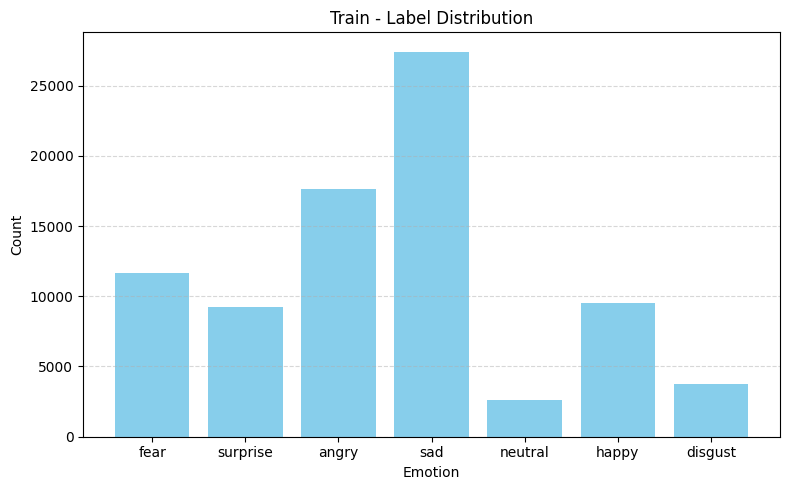


📋 Train Label Table:



,Emotion,Count,Ratio
0,fear,11651,0.142417
1,surprise,9247,0.113032
2,angry,17641,0.215636
3,sad,27422,0.335195
4,neutral,2610,0.031904
5,happy,9510,0.116246
6,disgust,3728,0.045570


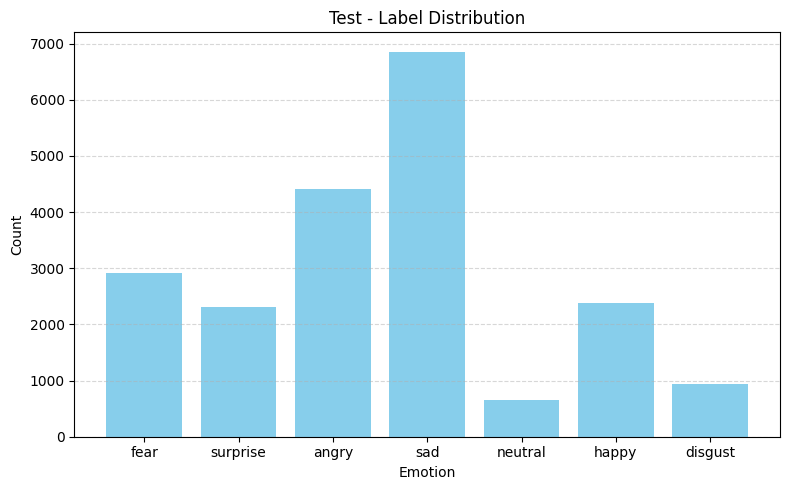


📋 Test Label Table:



,Emotion,Count,Ratio
0,fear,2913,0.142424
1,surprise,2312,0.113040
2,angry,4411,0.215665
3,sad,6856,0.335208
4,neutral,652,0.031878
5,happy,2377,0.116218
6,disgust,932,0.045568


In [12]:
#데이터셋 점검

import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# 1. 라벨 숫자를 영어 감정 이름으로 매핑
label_map = {
    0: "fear",
    1: "surprise",
    2: "angry",
    3: "sad",
    4: "neutral",
    5: "happy",
    6: "disgust"
}

def plot_label_distribution(labels, title):
    counter = Counter(labels)

    # 매핑된 감정 이름과 count 정리
    label_names = [label_map[i] for i in sorted(counter.keys())]
    counts = [counter[i] for i in sorted(counter.keys())]

    # 데이터프레임 만들기
    df = pd.DataFrame({
        'Emotion': label_names,
        'Count': counts
    })
    df['Ratio'] = df['Count'] / df['Count'].sum()

    # 바형 그래프
    plt.figure(figsize=(8, 5))
    plt.bar(df['Emotion'], df['Count'], color='skyblue')
    plt.title(f'{title} - Label Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # 표 형태 출력도 함께
    print(f"\n📋 {title} Label Table:\n")
    display(df)

# 🔹 Train 데이터셋 시각화
plot_label_distribution(train_labels, "Train")

# 🔹 Test 데이터셋 시각화
plot_label_distribution(test_labels, "Test")

In [13]:
#---------------------------------------------------------------------------------------------------------------------

In [14]:
# model fine-tuning train 시작

In [15]:
#1. 라이브러리 설치 및 임포트
!pip install transformers datasets torch tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from tqdm import tqdm

In [16]:
#2. KoBERT 토크나이저 & 사전학습 모델 불러오기
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")
model = AutoModelForSequenceClassification.from_pretrained("skt/kobert-base-v1", num_labels=7) # 라벨 7개
#skt/kobert-base-v1 사전학습 모델 자체는 언어 모델(BERT 기반)이라서 감정 개수와 무관하게 기본 언어 이해용 모델, 따라서 모델을 가져올때 num_labels만 지정해주면 okay

#3. Data클래스셋 정의 : 이미 전처리 과정에서 완료하였음.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
#4. DataLoader 준비
#train_dataset = EmotionDataset(train_encodings, train_labels)
#test_dataset = EmotionDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4) # num_workers = 병렬연산 추가
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [18]:
# 데이터셋이랑 model을 하나의 연산장치로...
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-

In [19]:
#5. 5. 옵티마이저, 스케줄러, 손실함수 정의
# 위의 중간점검에서 확인한 클래스 불균형 문제를 해결하기 위한 class weight 부여, 학습 데이터셋에서 감정이 sad로 편중되어 있을뿐 그게 우리가 실제 적용할 도메인인 동화책에서의 감정이 sad가 대부분이지는 않기 때문에 이렇게 해준다.

num_classes = 7  # 클래스 개수 정의

import numpy as np
from collections import Counter

label_counts = Counter(train_labels)
total_count = len(train_labels)

class_weights_list = []
for i in range(num_classes):
    count = label_counts[i] if i in label_counts else 0
    weight = total_count / (count + 1e-5)
    class_weights_list.append(weight)

class_weights_list = np.array(class_weights_list)
class_weights_list = class_weights_list / class_weights_list.sum() * num_classes

class_weights = torch.tensor(class_weights_list, dtype=torch.float).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

In [20]:
#loss_fn = nn.CrossEntropyLoss()  # 기본

optimizer = AdamW(model.parameters(), lr=5e-5)
total_steps = len(train_loader) * 3  # 3 epochs 예시

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

In [21]:
from datasets import Dataset

# ✅ HuggingFace Dataset으로 변환
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# ✅ Tokenizer 적용 함수 정의
def tokenize_fn(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

# ✅ Tokenizer 적용
train_dataset = train_dataset.map(tokenize_fn, batched=True)
test_dataset = test_dataset.map(tokenize_fn, batched=True)

# ✅ 불필요한 열 제거 (예: text, index 등)
cols_to_remove = [col for col in ['text', '__index_level_0__'] if col in train_dataset.column_names]
train_dataset = train_dataset.remove_columns(cols_to_remove)
test_dataset = test_dataset.remove_columns(cols_to_remove)

# ✅ tensor 형식으로 변환
train_dataset.set_format("torch")
test_dataset.set_format("torch")

Map:   0%|          | 0/81809 [00:00<?, ? examples/s]

Map:   0%|          | 0/20453 [00:00<?, ? examples/s]

In [22]:
#6. 학습 함수

import torch
import torch.nn as nn
from transformers import BertModel, AutoTokenizer, TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score
import torch.nn.functional as F

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Focal Loss 정의
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, reduction='mean'):
        super().__init__()
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):
        ce_loss = F.cross_entropy(logits, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# 2. Custom KoBERT + MLP 모델 (pooler_output 사용, FocalLoss)
class CustomKoBERTFocal(nn.Module):
    def __init__(self, model_name, num_labels):
        super().__init__()
        self.bert = BertModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.5)
        self.layer_norm = nn.LayerNorm(self.bert.config.hidden_size)
        self.mlp = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_labels)
        )
        self.loss_fn = FocalLoss()

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # 중요: pooler_output 사용
        x = self.dropout(pooled_output)
        x = self.layer_norm(x)
        logits = self.mlp(x)

        if labels is not None:
            loss = self.loss_fn(logits, labels)
            return {"loss": loss, "logits": logits}
        else:
            return {"logits": logits}

# 3. 평가지표 정의
def compute_metrics(p):
    preds, labels = p
    preds = preds.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {"accuracy": acc, "f1": f1}

# 4. 모델 및 토크나이저 초기화
num_labels = 7  # 예시 클래스 수
model = CustomKoBERTFocal(model_name="skt/kobert-base-v1", num_labels=num_labels)
tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")

# 5. TrainingArguments 설정
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    save_total_limit=2,
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    logging_dir="./logs",
    report_to="none",  # wandb 안 쓸 경우 none
    weight_decay=0.01,
    warmup_steps=500,
    lr_scheduler_type="linear",
    fp16=True,  # Half precision
)

# EarlyStoppingCallback 설정
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3)

# 6. Trainer
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
    compute_metrics=compute_metrics
)
# 7. 학습 실행
trainer.train()

# 8. 훈련 후 평가 (train acc 포함)
train_metrics = trainer.evaluate(eval_dataset=train_dataset)
val_metrics = trainer.evaluate(eval_dataset=test_dataset)

print(f"Train Accuracy: {train_metrics['eval_accuracy']:.4f}, Train F1: {train_metrics['eval_f1']:.4f}")
print(f"Val Accuracy: {val_metrics['eval_accuracy']:.4f}, Val F1: {val_metrics['eval_f1']:.4f}")

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.101700,1.108823,0.356671,0.228663
2,0.956500,0.958247,0.425414,0.376831
3,0.867000,0.880942,0.492837,0.475009
4,0.807600,0.825173,0.518359,0.502518
5,0.761100,0.808146,0.527355,0.510134
6,0.711600,0.795279,0.542121,0.530829
7,0.684400,0.805085,0.551215,0.540003
8,0.652700,0.803344,0.555615,0.547971
9,0.614900,0.827597,0.552877,0.546691


Train Accuracy: 0.5929, Train F1: 0.5842
Val Accuracy: 0.5421, Val F1: 0.5308


In [23]:
# 원하는 디렉토리 이름 지정
save_directory = "/content/results/saved_kobert_model"

# 모델 저장
trainer.save_model(save_directory)
tokenizer.save_pretrained(save_directory)

('/content/results/saved_kobert_model/tokenizer_config.json',
 '/content/results/saved_kobert_model/special_tokens_map.json',
 '/content/results/saved_kobert_model/spiece.model',
 '/content/results/saved_kobert_model/added_tokens.json',
 '/content/results/saved_kobert_model/tokenizer.json')

In [28]:
# 예: test_dataset이 datasets.Dataset 객체일 경우
test_dataset.to_csv("test_data.csv")

Creating CSV from Arrow format:   0%|          | 0/21 [00:00<?, ?ba/s]

21634031

In [24]:
import torch
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer

# 예측할 문장들
texts = [
    "아버지, 저는 도저히 이 참을 수 없는 억울함을 이대로 삼킬 수 없습니다.",
    "제비가 다친 다리를 치료해 주었더니 박씨를 물어다 주었어요.",
    "형님은 박을 타자마자 금은보화가 쏟아졌어요!",
    "해님이 웃고 있었어요. 하지만 달님은 눈물을 흘리고 있었죠.",
    "호랑이가 엄마 목소리를 흉내 내며 문을 열라고 했어요.",
    "우리 아버지는 나무꾼이에요. 저를 데려가지 마세요.",
    "도깨비는 금덩이를 주며 ‘너는 착한 아이로구나!’ 하고 말했어요.",
    "그는 결국 거짓말이 들통나 큰 벌을 받고 말았어요.",
    "세상에 이런 기적이! 소금이 멈추질 않네!",
    "아기 돼지 삼형제 중 막내는 벽돌로 단단한 집을 지었어요.",
]

# 감정 레이블 매핑 (학습에 사용한 인덱스 순서에 맞게 수정하세요)
id2label = {
    0: "불안",
    1: "당황",
    2: "분노",
    3: "슬픔",
    4: "중립",
    5: "기쁨",
    6: "혐오"
}

# 데이터프레임 및 HuggingFace Dataset 생성
pred_df = pd.DataFrame({"text": texts})
pred_dataset = Dataset.from_pandas(pred_df)

# 전처리 함수 정의 및 토큰화
def preprocess(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

pred_dataset_tokenized = pred_dataset.map(preprocess, batched=True)

# Trainer 객체를 사용한 예측 수행
predictions_output = trainer.predict(pred_dataset_tokenized)
pred_class_indices = predictions_output.predictions.argmax(axis=-1)
pred_labels = [id2label[i] for i in pred_class_indices]

# 결과 출력
for i, (text, label) in enumerate(zip(texts, pred_labels), 1):
    print(f"{i}. \"{text}\"\n  → 예측 감정: {label}\n")

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

1. "아버지, 저는 도저히 이 참을 수 없는 억울함을 이대로 삼킬 수 없습니다."
  → 예측 감정: 기쁨

2. "제비가 다친 다리를 치료해 주었더니 박씨를 물어다 주었어요."
  → 예측 감정: 슬픔

3. "형님은 박을 타자마자 금은보화가 쏟아졌어요!"
  → 예측 감정: 혐오

4. "해님이 웃고 있었어요. 하지만 달님은 눈물을 흘리고 있었죠."
  → 예측 감정: 슬픔

5. "호랑이가 엄마 목소리를 흉내 내며 문을 열라고 했어요."
  → 예측 감정: 당황

6. "우리 아버지는 나무꾼이에요. 저를 데려가지 마세요."
  → 예측 감정: 슬픔

7. "도깨비는 금덩이를 주며 ‘너는 착한 아이로구나!’ 하고 말했어요."
  → 예측 감정: 불안

8. "그는 결국 거짓말이 들통나 큰 벌을 받고 말았어요."
  → 예측 감정: 슬픔

9. "세상에 이런 기적이! 소금이 멈추질 않네!"
  → 예측 감정: 기쁨

10. "아기 돼지 삼형제 중 막내는 벽돌로 단단한 집을 지었어요."
  → 예측 감정: 당황



In [25]:
train_metrics = trainer.evaluate(eval_dataset=train_dataset)
print("Train Accuracy:", train_metrics['eval_accuracy'])
print("Train F1:", train_metrics['eval_f1'])

Train Accuracy: 0.5929054260533682
Train F1: 0.5841946143109095


In [26]:
print("🔍 Training 데이터셋 평가 중...")
train_result = trainer.evaluate(eval_dataset=train_dataset)
print(train_result)

🔍 Training 데이터셋 평가 중...


{'eval_loss': 0.6435109376907349, 'eval_accuracy': 0.5929054260533682, 'eval_f1': 0.5841946143109095, 'eval_runtime': 140.807, 'eval_samples_per_second': 581.001, 'eval_steps_per_second': 18.16, 'epoch': 9.0}


In [27]:
# test_dataset은 미리 전처리한 테스트셋
results = trainer.predict(test_dataset)

print("=== Test Set Evaluation ===")
print(f"Test Loss: {results.metrics['test_loss']:.4f}")
print(f"Test Accuracy: {results.metrics['test_accuracy']:.4f}")
print(f"Test F1 Score: {results.metrics['test_f1']:.4f}")

=== Test Set Evaluation ===
Test Loss: 0.7953
Test Accuracy: 0.5421
Test F1 Score: 0.5308
